In [1]:
#Import Dependencies
import pandas as pd
import numpy as np

#File to load
file_path = "Data/alcsales_August2020_codedfullfile.csv"

# Read Purchasing File and store into Pandas data frame
alcohol_sales_data = pd.read_csv(file_path)
alcohol_sales_data['Month - Year (Date)'] = pd.to_datetime(alcohol_sales_data['Month - Year (Word)'])
alcohol_sales_data.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
0,2017,1,2,1,103645,42598,593378,0.0718,Alaska,January,January 2017,1 2017,2017-01-01
1,2017,1,5,1,402885,165586,2455022,0.0674,Arkansas,January,January 2017,1 2017,2017-01-01
2,2017,1,8,1,733857,301615,4634346,0.0651,Colorado,January,January 2017,1 2017,2017-01-01
3,2017,1,9,1,412100,169373,3015481,0.0562,Connecticut,January,January 2017,1 2017,2017-01-01
4,2017,1,10,1,180388,74139,799550,0.0927,Delaware,January,January 2017,1 2017,2017-01-01


In [2]:
#TEST SCRIPT - Calculate total number of data points
data_points = len(alcohol_sales_data)
data_points

2265

In [64]:
month_date_alcohol_sales_groupby = alcohol_sales_data.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_avg_pop = month_date_alcohol_sales_groupby["Population"].mean()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

cleaned_month_date_alcohol_sales_groupby_df = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_avg_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

cleaned_month_date_alcohol_sales_groupby_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,213428134,17952672,5.841676e+06,0.057390
2017-02-01,202554024,17181353,5.841676e+06,0.056627
2017-03-01,234341479,19741824,5.841676e+06,0.066356
2017-04-01,242022452,19623984,5.841676e+06,0.065969
2017-05-01,253716538,20843786,5.841676e+06,0.071760


Text(0, 0.5, 'Gallons of Alcohol')

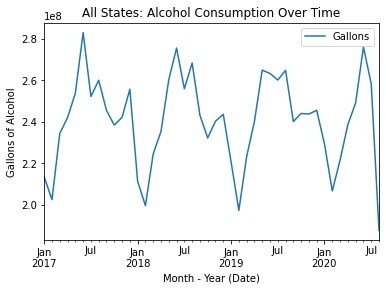

In [65]:
#Plot
cleaned_month_date_alcohol_sales_groupby_df.plot.line( y='Gallons', title="All States: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

#Need to increase size and add more ticks
#Also need to clean the data to remove any states that did not have data for all dates

In [3]:
#TEST SCRIPT - Calculate total number of data points per year
#Groupby
state_alcohol_sales_groupby = alcohol_sales_data.groupby(['State'])

#Find count of data point per state
count_per_state = state_alcohol_sales_groupby.size()
count_per_state.head()

State
Alaska         132
Arkansas       132
Colorado       132
Connecticut    129
Delaware       129
dtype: int64

In [4]:
# Count the total of screen names "SN" by age group and find sum of all
total_ethanol = state_alcohol_sales_groupby["Gallons"].sum()
total_ethanol.head()


State
Alaska          66763764
Arkansas       211641222
Colorado       562826422
Connecticut    270652431
Delaware       101224349
Name: Gallons, dtype: int64

In [5]:
total_population = state_alcohol_sales_groupby["Population"].sum()
total_population.head()

State
Alaska          77997828
Arkansas       325696704
Colorado       623966136
Connecticut    389340432
Delaware       104423427
Name: Population, dtype: int64

In [6]:
grouped_state_df = pd.DataFrame({
    "Count": count_per_state,
    "Gallons": total_ethanol,
    "Total Population": total_population
})

grouped_state_df

,Count,Gallons,Total Population
State,,,
Alaska,132,66763764,77997828
Arkansas,132,211641222,325696704
Colorado,132,562826422,623966136
Connecticut,129,270652431,389340432
Delaware,129,101224349,104423427
Florida,129,1963678488,2323138986
Illinois,132,1140012903,1389969696
Kansas,88,214345767,208149040
Kentucky,132,326617001,486159252


In [36]:
#Alaska only
alaska_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Alaska']

#Groupby year
alaska_by_year = alaska_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
alaska_total_gallons = alaska_by_year["Gallons"].sum()

# Find sum of ethanol
alaska_total_ethanol = alaska_by_year["Ethanol"].sum()

# Find average of population
alaska_avg_pop = alaska_by_year["Population"].mean()

# Find average pc
alaska_avg_pc = alaska_by_year["PerCapita"].mean()

cleaned_alaska_df = pd.DataFrame({
    "Gallons": alaska_total_gallons,
    "Ethanol": alaska_total_ethanol,
    "Population": alaska_avg_pop,
    "PerCapita": alaska_avg_pc
    
})

cleaned_alaska_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,1031551,96155,593378,0.054000
2017-02-01,1129711,108795,593378,0.061133
2017-03-01,1453069,134456,593378,0.075533
2017-04-01,1367197,123712,593378,0.069500
2017-05-01,1841678,159711,593378,0.089733


In [14]:
#Import matplotlib dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

Text(0, 0.5, 'Gallons of Alcohol')

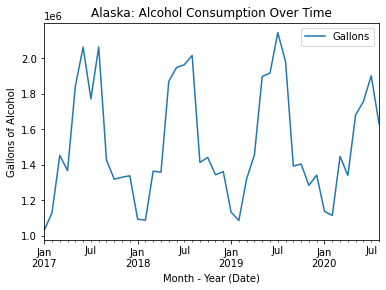

In [15]:
#Plot Alaska
cleaned_alaska_df.plot.line( y='Gallons', title="Alaska: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [20]:
#Arkansas only
arkansas_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Arkansas']

#Groupby year
arkansas_by_year = arkansas_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
arkansas_total_gallons = arkansas_by_year["Gallons"].sum()

# Find sum of ethanol
arkansas_total_ethanol = arkansas_by_year["Ethanol"].sum()

arkansas_avg_pop = arkansas_by_year["Population"].mean()

# Find average pc
arkansas_avg_pc = arkansas_by_year["PerCapita"].mean()

cleaned_arkansas_df = pd.DataFrame({
    "Gallons": arkansas_total_gallons,
    "Ethanol": arkansas_total_ethanol,
    "Population": arkansas_avg_pop,
    "PerCapita": arkansas_avg_pc
    
})

cleaned_arkansas_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,4254529,376831,2455022,0.051133
2017-02-01,4095944,304688,2455022,0.041367
2017-03-01,4362869,327557,2455022,0.044467
2017-04-01,4801439,366677,2455022,0.049800
2017-05-01,5001547,358703,2455022,0.048700


Text(0, 0.5, 'Gallons of Alcohol')

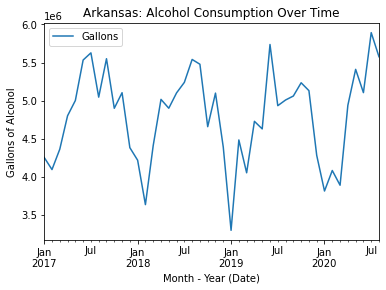

In [19]:
#Plot Arkansas
cleaned_arkansas_df.plot.line( y='Gallons', title="Arkansas: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [22]:
#Colorado only
colorado_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Colorado']

#Groupby year
colorado_by_year = colorado_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
colorado_total_gallons = colorado_by_year["Gallons"].sum()

# Find sum of ethanol
colorado_total_ethanol = colorado_by_year["Ethanol"].sum()

colorado_avg_pop = colorado_by_year["Population"].mean()

# Find average pc
colorado_avg_pc = colorado_by_year["PerCapita"].mean()

cleaned_colorado_df = pd.DataFrame({
    "Gallons": colorado_total_gallons,
    "Ethanol": colorado_total_ethanol,
    "Population": colorado_avg_pop,
    "PerCapita": colorado_avg_pc
    
})

cleaned_colorado_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,10061858,817722,4634346,0.058800
2017-02-01,10381811,931925,4634346,0.067033
2017-03-01,12518995,1113251,4634346,0.080067
2017-04-01,11271388,968862,4634346,0.069700
2017-05-01,13389596,1161497,4634346,0.083533


Text(0, 0.5, 'Gallons of Alcohol')

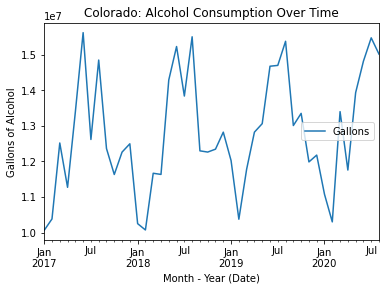

In [23]:
#Plot Colorado
cleaned_colorado_df.plot.line( y='Gallons', title="Colorado: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [24]:
#Connecticut only
connecticut_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Connecticut']

#Groupby year
connecticut_by_year = connecticut_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
connecticut_total_gallons = connecticut_by_year["Gallons"].sum()

# Find sum of ethanol
connecticut_total_ethanol = connecticut_by_year["Ethanol"].sum()

connecticut_avg_pop = connecticut_by_year["Population"].mean()

# Find average pc
connecticut_avg_pc = connecticut_by_year["PerCapita"].mean()

cleaned_connecticut_df = pd.DataFrame({
    "Gallons": connecticut_total_gallons,
    "Ethanol": connecticut_total_ethanol,
    "Population": connecticut_avg_pop,
    "PerCapita": connecticut_avg_pc
    
})

cleaned_connecticut_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,4656852,427144,3015481,0.047233
2017-02-01,5160850,529699,3015481,0.058567
2017-03-01,6172341,599589,3015481,0.066267
2017-04-01,5930047,550922,3015481,0.060900
2017-05-01,7045182,653994,3015481,0.072300


Text(0, 0.5, 'Gallons of Alcohol')

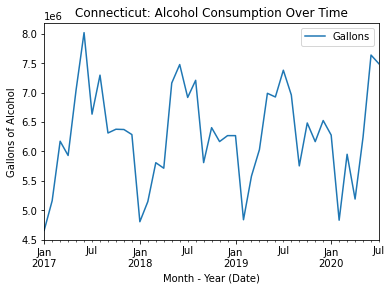

In [25]:
#Plot Connecticut
cleaned_connecticut_df.plot.line( y='Gallons', title="Connecticut: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [26]:
#Delaware only
delaware_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Delaware']

#Groupby year
delaware_by_year = delaware_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
delaware_total_gallons = delaware_by_year["Gallons"].sum()

# Find sum of ethanol
delaware_total_ethanol = delaware_by_year["Ethanol"].sum()

delaware_avg_pop = delaware_by_year["Population"].mean()

# Find average pc
delaware_avg_pc = delaware_by_year["PerCapita"].mean()

cleaned_delaware_df = pd.DataFrame({
    "Gallons": delaware_total_gallons,
    "Ethanol": delaware_total_ethanol,
    "Population": delaware_avg_pop,
    "PerCapita": delaware_avg_pc
    
})

cleaned_delaware_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,1586481,158737,799550,0.066167
2017-02-01,1886984,194929,799550,0.081300
2017-03-01,2213972,232172,799550,0.096767
2017-04-01,2052643,218240,799550,0.090967
2017-05-01,2822911,278303,799550,0.116033


Text(0, 0.5, 'Gallons of Alcohol')

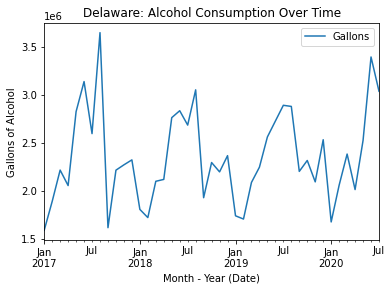

In [27]:
#Plot Delaware
cleaned_delaware_df.plot.line( y='Gallons', title="Delaware: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [28]:
#Florida only
florida_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Florida']

#Groupby year
florida_by_year = florida_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
florida_total_gallons = florida_by_year["Gallons"].sum()

# Find sum of ethanol
florida_total_ethanol = florida_by_year["Ethanol"].sum()

florida_avg_pop = florida_by_year["Population"].mean()

# Find average pc
florida_avg_pc = florida_by_year["PerCapita"].mean()

cleaned_florida_df = pd.DataFrame({
    "Gallons": florida_total_gallons,
    "Ethanol": florida_total_ethanol,
    "Population": florida_avg_pop,
    "PerCapita": florida_avg_pc
    
})

cleaned_florida_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,38978412,3271041,17722275,0.061533
2017-02-01,41846274,3697778,17722275,0.069567
2017-03-01,52218721,4529317,17722275,0.085200
2017-04-01,45390404,3753910,17722275,0.070633
2017-05-01,48477676,4126105,17722275,0.077600


Text(0, 0.5, 'Gallons of Alcohol')

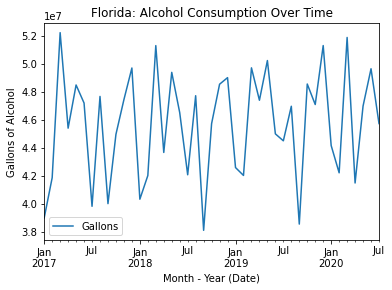

In [29]:
#Plot Florida
cleaned_florida_df.plot.line( y='Gallons', title="Florida: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [31]:
#Illinois only
illinois_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Illinois']

#Groupby year
illinois_by_year = illinois_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
illinois_total_gallons = illinois_by_year["Gallons"].sum()

# Find sum of ethanol
illinois_total_ethanol = illinois_by_year["Ethanol"].sum()

illinois_avg_pop = illinois_by_year["Population"].mean()

# Find average pc
illinois_avg_pc = illinois_by_year["PerCapita"].mean()

cleaned_illinois_df = pd.DataFrame({
    "Gallons": illinois_total_gallons,
    "Ethanol": illinois_total_ethanol,
    "Population": illinois_avg_pop,
    "PerCapita": illinois_avg_pc
    
})

cleaned_illinois_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,19081361,1418571,10556100,0.044800
2017-02-01,20807828,1673039,10556100,0.052833
2017-03-01,25807148,2060693,10556100,0.065100
2017-04-01,24512795,1873737,10556100,0.059200
2017-05-01,30371041,2383409,10556100,0.075233


Text(0, 0.5, 'Gallons of Alcohol')

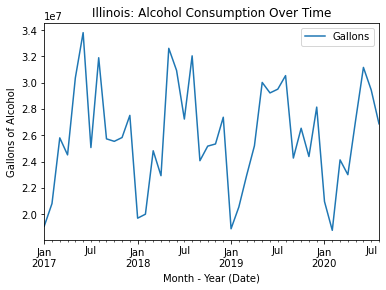

In [32]:
#Plot Illinois
cleaned_illinois_df.plot.line( y='Gallons', title="Illinois: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [33]:
#Kansas only
kansas_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Kansas']

#Groupby year
kansas_by_year = kansas_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
kansas_total_gallons = kansas_by_year["Gallons"].sum()

# Find sum of ethanol
kansas_total_ethanol = kansas_by_year["Ethanol"].sum()

kansas_avg_pop = kansas_by_year["Population"].mean()

# Find average pc
kansas_avg_pc = kansas_by_year["PerCapita"].mean()

cleaned_kansas_df = pd.DataFrame({
    "Gallons": illinois_total_gallons,
    "Ethanol": illinois_total_ethanol,
    "Population": illinois_avg_pop,
    "PerCapita": illinois_avg_pc
    
})

cleaned_kansas_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,19081361,1418571,10556100,0.044800
2017-02-01,20807828,1673039,10556100,0.052833
2017-03-01,25807148,2060693,10556100,0.065100
2017-04-01,24512795,1873737,10556100,0.059200
2017-05-01,30371041,2383409,10556100,0.075233


Text(0, 0.5, 'Gallons of Alcohol')

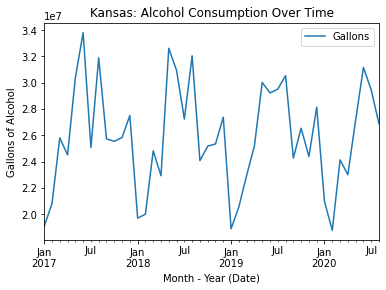

In [34]:
#Plot Kansas
cleaned_kansas_df.plot.line( y='Gallons', title="Kansas: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [37]:
#Kentucky only
kentucky_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Kentucky']

#Groupby year
kentucky_by_year = kentucky_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
kentucky_total_gallons = kentucky_by_year["Gallons"].sum()

# Find sum of ethanol
kentucky_total_ethanol = kentucky_by_year["Ethanol"].sum()

kentucky_avg_pop = kentucky_by_year["Population"].mean()

# Find average pc
kentucky_avg_pc = kentucky_by_year["PerCapita"].mean()

cleaned_kentucky_df = pd.DataFrame({
    "Gallons": kentucky_total_gallons,
    "Ethanol": kentucky_total_ethanol,
    "Population": kentucky_avg_pop,
    "PerCapita": kentucky_avg_pc
    
})

cleaned_kentucky_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,7475242,683424,3670568,0.062067
2017-02-01,5040964,343614,3670568,0.031200
2017-03-01,7287808,604146,3670568,0.054900
2017-04-01,7844952,628180,3670568,0.057033
2017-05-01,7054059,569145,3670568,0.051700


Text(0, 0.5, 'Gallons of Alcohol')

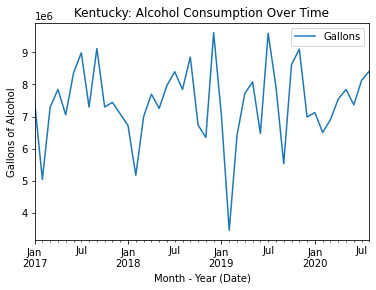

In [38]:
#Plot Kentucky
cleaned_kentucky_df.plot.line( y='Gallons', title="Kentucky: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [39]:
#Louisiana only
louisiana_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Louisiana']

#Groupby year
louisiana_by_year = louisiana_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
louisiana_total_gallons = louisiana_by_year["Gallons"].sum()

# Find sum of ethanol
louisiana_total_ethanol = louisiana_by_year["Ethanol"].sum()

louisiana_avg_pop = louisiana_by_year["Population"].mean()

# Find average pc
louisiana_avg_pc = louisiana_by_year["PerCapita"].mean()

cleaned_louisiana_df = pd.DataFrame({
    "Gallons": louisiana_total_gallons,
    "Ethanol": louisiana_total_ethanol,
    "Population": louisiana_avg_pop,
    "PerCapita": louisiana_avg_pc
    
})

cleaned_louisiana_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,1324846,349443,3807282,0.04585
2017-02-01,1418069,380419,3807282,0.04995
2017-03-01,1663745,444203,3807282,0.05835
2017-04-01,1493095,398424,3807282,0.05235
2017-05-01,1626509,435335,3807282,0.05715


Text(0, 0.5, 'Gallons of Alcohol')

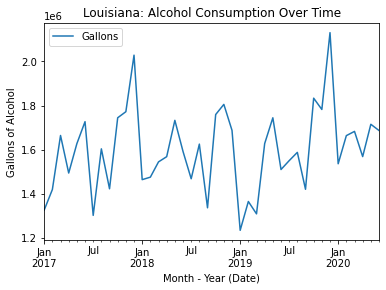

In [40]:
#Plot Louisiana
cleaned_louisiana_df.plot.line( y='Gallons', title="Louisiana: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [41]:
#Massachusetts only
massachusetts_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Massachusetts']

#Groupby year
massachusetts_by_year = massachusetts_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
massachusetts_total_gallons = massachusetts_by_year["Gallons"].sum()

# Find sum of ethanol
massachusetts_total_ethanol = massachusetts_by_year["Ethanol"].sum()

massachusetts_avg_pop = massachusetts_by_year["Population"].mean()

# Find average pc
massachusetts_avg_pc = massachusetts_by_year["PerCapita"].mean()

cleaned_massachusetts_df = pd.DataFrame({
    "Gallons": massachusetts_total_gallons,
    "Ethanol": massachusetts_total_ethanol,
    "Population": massachusetts_avg_pop,
    "PerCapita": massachusetts_avg_pc
    
})

cleaned_massachusetts_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,10048538,755332,5815595,0.043300
2017-02-01,10584705,938637,5815595,0.053767
2017-03-01,14402964,1320627,5815595,0.075700
2017-04-01,13518116,1172739,5815595,0.067233
2017-05-01,15961398,1395388,5815595,0.079967


Text(0, 0.5, 'Gallons of Alcohol')

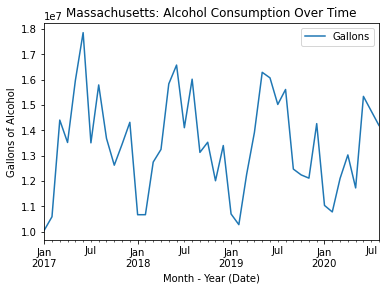

In [42]:
#Plot Massachusetts
cleaned_massachusetts_df.plot.line( y='Gallons', title="Massachusetts: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [43]:
#Missouri only
missouri_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Missouri']

#Groupby year
missouri_by_year = missouri_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
missouri_total_gallons = missouri_by_year["Gallons"].sum()

# Find sum of ethanol
missouri_total_ethanol = missouri_by_year["Ethanol"].sum()

missouri_avg_pop = missouri_by_year["Population"].mean()

# Find average pc
missouri_avg_pc = missouri_by_year["PerCapita"].mean()

cleaned_missouri_df = pd.DataFrame({
    "Gallons": missouri_total_gallons,
    "Ethanol": missouri_total_ethanol,
    "Population": missouri_avg_pop,
    "PerCapita": missouri_avg_pc
    
})

cleaned_missouri_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,11080651,812306,5037634,0.053733
2017-02-01,11278507,967676,5037634,0.064033
2017-03-01,13527957,1110946,5037634,0.073500
2017-04-01,12951436,1031270,5037634,0.068267
2017-05-01,14416484,1146884,5037634,0.075867


Text(0, 0.5, 'Gallons of Alcohol')

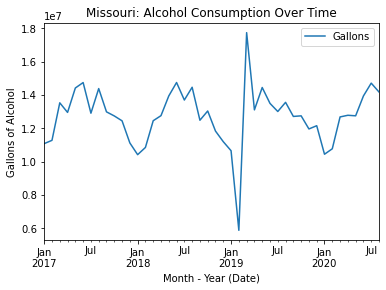

In [44]:
#Plot Missouri
cleaned_missouri_df.plot.line( y='Gallons', title="Missouri: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [45]:
#North Dakota only
northdakota_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'North Dakota']

#Groupby year
northdakota_by_year = northdakota_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
northdakota_total_gallons = northdakota_by_year["Gallons"].sum()

# Find sum of ethanol
northdakota_total_ethanol = northdakota_by_year["Ethanol"].sum()

northdakota_avg_pop = northdakota_by_year["Population"].mean()

# Find average pc
northdakota_avg_pc = northdakota_by_year["PerCapita"].mean()

cleaned_northdakota_df = pd.DataFrame({
    "Gallons": northdakota_total_gallons,
    "Ethanol": northdakota_total_ethanol,
    "Population": northdakota_avg_pop,
    "PerCapita": northdakota_avg_pc
    
})

cleaned_northdakota_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,1700759,130006,613251,0.070667
2017-02-01,1739173,137387,613251,0.074667
2017-03-01,1886332,154797,613251,0.084133
2017-04-01,2229208,163044,613251,0.088600
2017-05-01,2415997,184089,613251,0.100067


Text(0, 0.5, 'Gallons of Alcohol')

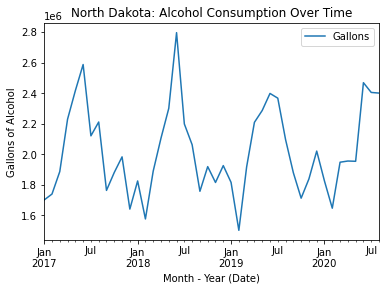

In [46]:
#Plot North Dakota
cleaned_northdakota_df.plot.line( y='Gallons', title="North Dakota: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [47]:
#Oregon only
oregon_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Oregon']

#Groupby year
oregon_by_year = oregon_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
oregon_total_gallons = oregon_by_year["Gallons"].sum()

# Find sum of ethanol
oregon_total_ethanol = oregon_by_year["Ethanol"].sum()

oregon_avg_pop = oregon_by_year["Population"].mean()

# Find average pc
oregon_avg_pc = oregon_by_year["PerCapita"].mean()

cleaned_oregon_df = pd.DataFrame({
    "Gallons": oregon_total_gallons,
    "Ethanol": oregon_total_ethanol,
    "Population": oregon_avg_pop,
    "PerCapita": oregon_avg_pc
    
})

cleaned_oregon_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,7550045,463761,3468412,0.06685
2017-02-01,7647034,435315,3468412,0.06275
2017-03-01,8286291,480837,3468412,0.06930
2017-04-01,10407890,590894,3468412,0.08520
2017-05-01,8320421,468002,3468412,0.06745


Text(0, 0.5, 'Gallons of Alcohol')

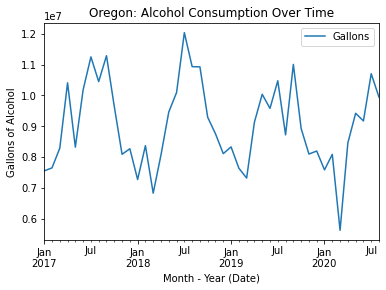

In [48]:
#Plot Oregon
cleaned_oregon_df.plot.line( y='Gallons', title="Oregon: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [49]:
#Tennessee only
tennessee_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Tennessee']

#Groupby year
tennessee_by_year = tennessee_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
tennessee_total_gallons = tennessee_by_year["Gallons"].sum()

# Find sum of ethanol
tennessee_total_ethanol = tennessee_by_year["Ethanol"].sum()

tennessee_avg_pop = tennessee_by_year["Population"].mean()

# Find average pc
tennessee_avg_pc = tennessee_by_year["PerCapita"].mean()

cleaned_tennessee_df = pd.DataFrame({
    "Gallons": tennessee_total_gallons,
    "Ethanol": tennessee_total_ethanol,
    "Population": tennessee_avg_pop,
    "PerCapita": tennessee_avg_pc
    
})

cleaned_tennessee_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,11092557,1083160,5545920,0.065067
2017-02-01,11341386,833638,5545920,0.050133
2017-03-01,10217791,819927,5545920,0.049267
2017-04-01,10873360,919559,5545920,0.055267
2017-05-01,12457594,962329,5545920,0.057833


Text(0, 0.5, 'Gallons of Alcohol')

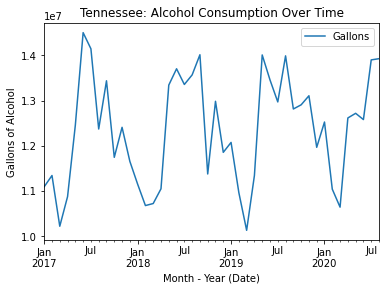

In [50]:
#Plot Tennessee
cleaned_tennessee_df.plot.line( y='Gallons', title="Tennessee: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [51]:
#Texas only
texas_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Texas']

#Groupby year
texas_by_year = texas_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
texas_total_gallons = texas_by_year["Gallons"].sum()

# Find sum of ethanol
texas_total_ethanol = texas_by_year["Ethanol"].sum()

texas_avg_pop = texas_by_year["Population"].mean()

# Find average pc
texas_avg_pc = texas_by_year["PerCapita"].mean()

cleaned_texas_df = pd.DataFrame({
    "Gallons": texas_total_gallons,
    "Ethanol": texas_total_ethanol,
    "Population": texas_avg_pop,
    "PerCapita": texas_avg_pc
    
})

cleaned_texas_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,62772657,4846257,22572383,0.071567
2017-02-01,48611261,3722639,22572383,0.054967
2017-03-01,50096496,3595839,22572383,0.053100
2017-04-01,64077392,4440240,22572383,0.065567
2017-05-01,57390914,4160218,22572383,0.061433


Text(0, 0.5, 'Gallons of Alcohol')

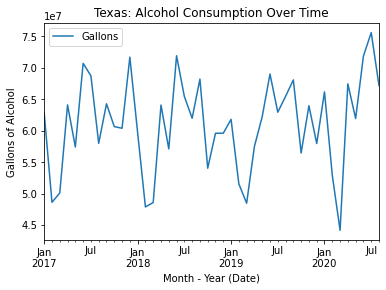

In [52]:
#Plot Texas
cleaned_texas_df.plot.line( y='Gallons', title="Texas: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [53]:
#Utah only
utah_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Utah']

#Groupby year
utah_by_year = utah_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
utah_total_gallons = utah_by_year["Gallons"].sum()

# Find sum of ethanol
utah_total_ethanol = utah_by_year["Ethanol"].sum()

utah_avg_pop = utah_by_year["Population"].mean()

# Find average pc
utah_avg_pc = utah_by_year["PerCapita"].mean()

cleaned_utah_df = pd.DataFrame({
    "Gallons": utah_total_gallons,
    "Ethanol": utah_total_ethanol,
    "Population": utah_avg_pop,
    "PerCapita": utah_avg_pc
    
})

cleaned_utah_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,543896,143172,2376114,0.03015
2017-02-01,498978,130594,2376114,0.02745
2017-03-01,616653,161630,2376114,0.03400
2017-04-01,500667,129956,2376114,0.02735
2017-05-01,539375,138741,2376114,0.02920


Text(0, 0.5, 'Gallons of Alcohol')

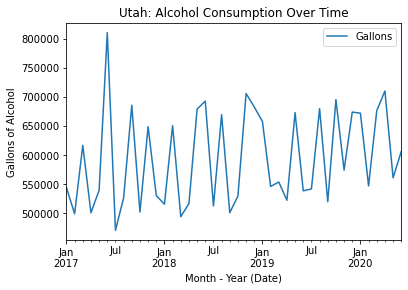

In [54]:
#Plot Utah
cleaned_utah_df.plot.line( y='Gallons', title="Utah: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [55]:
#Virginia only
virginia_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Virginia']

#Groupby year
virginia_by_year = virginia_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
virginia_total_gallons = virginia_by_year["Gallons"].sum()

# Find sum of ethanol
virginia_total_ethanol = virginia_by_year["Ethanol"].sum()

virginia_avg_pop = virginia_by_year["Population"].mean()

# Find average pc
virginia_avg_pc = virginia_by_year["PerCapita"].mean()

cleaned_virginia_df = pd.DataFrame({
    "Gallons": virginia_total_gallons,
    "Ethanol": virginia_total_ethanol,
    "Population": virginia_avg_pop,
    "PerCapita": virginia_avg_pc
    
})

cleaned_virginia_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,12959967,1036787,7015247,0.049267
2017-02-01,12995750,1048658,7015247,0.049833
2017-03-01,15428824,1225027,7015247,0.058233
2017-04-01,14883129,1171129,7015247,0.055667
2017-05-01,17868855,1352211,7015247,0.064267


Text(0, 0.5, 'Gallons of Alcohol')

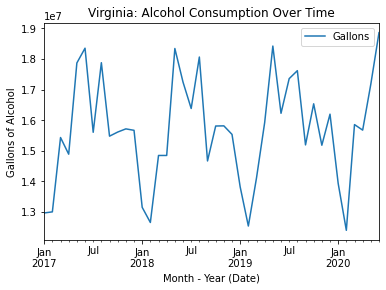

In [56]:
#Plot Virginia
cleaned_virginia_df.plot.line( y='Gallons', title="Virginia: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [59]:
#Wisconsic only
wisconsin_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Wisconsin']

#Groupby year
wisconsin_by_year = wisconsin_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
wisconsin_total_gallons = wisconsin_by_year["Gallons"].sum()

# Find sum of ethanol
wisconsin_total_ethanol = wisconsin_by_year["Ethanol"].sum()

wisconsin_avg_pop = wisconsin_by_year["Population"].mean()

# Find average pc
wisconsin_avg_pc = wisconsin_by_year["PerCapita"].mean()

cleaned_wisconsin_df = pd.DataFrame({
    "Gallons": wisconsin_total_gallons,
    "Ethanol": wisconsin_total_ethanol,
    "Population": wisconsin_avg_pop,
    "PerCapita": wisconsin_avg_pc
    
})

cleaned_wisconsin_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,2664892,735108,4805415,0.0765
2017-02-01,1895748,495250,4805415,0.0515
2017-03-01,1941876,509778,4805415,0.0530
2017-04-01,2707841,743664,4805415,0.0774
2017-05-01,2145225,577700,4805415,0.0601


Text(0, 0.5, 'Gallons of Alcohol')

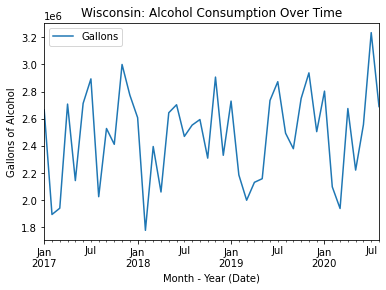

In [60]:
#Plot Wisconsin
cleaned_wisconsin_df.plot.line( y='Gallons', title="Wisconsin: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')